# Homework 2 - Logistic Regression
In Andrew Ng's course, we learned about logistic regression, a classification learning algorithm that will be used to solve the problem description.

Problem description: In a dataset called "ex2data1.txt", there are two tests grades of a student and their acceptance into the college in a training example.

Example:   85.38384, 28.3884, 0

Build a classification model that estimates an applicant's probability of admission based on the scores of the two provided exams.

## Preprocessing

In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

In [455]:
dataset = pd.read_csv("ex2data1.txt", header=None)
dataset.columns = ["Test Score 1", "Test Score 2", "Admittance"]
dataset.head()

,Test Score 1,Test Score 2,Admittance
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [456]:
dataset.describe()

,Test Score 1,Test Score 2,Admittance
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [457]:
X_matrix_original = dataset.iloc[:, [0, 1]].values
Y_matrix_original = dataset.iloc[:, [-1]].values

# For visualization, look at just the first 10.
for i in range(10):
    print("[ {} {} ] [ {} ]".format(X_matrix_original[i][0], \
                                    X_matrix_original[i][1], \
                                    Y_matrix_original[i][0]))

[ 34.62365962451697 78.0246928153624 ] [ 0 ]
[ 30.28671076822607 43.894997524001006 ] [ 0 ]
[ 35.84740876993872 72.90219802708364 ] [ 0 ]
[ 60.18259938620975 86.30855209546827 ] [ 1 ]
[ 79.0327360507101 75.3443764369103 ] [ 1 ]
[ 45.083277476683385 56.316371781530506 ] [ 0 ]
[ 61.10666453684766 96.51142588489624 ] [ 1 ]
[ 75.02474556738889 46.55401354116538 ] [ 1 ]
[ 76.09878670226256 87.42056971926803 ] [ 1 ]
[ 84.43281996120034 43.533393310721095 ] [ 1 ]


## Visualization

In [458]:
# Select all rows with admittance (1)
admitted_matrix = np.array([[1.0, 1.0, 1.0]])
for row in dataset.values:
    if row[2] == 1.0:
        admitted_matrix = np.append(admitted_matrix, np.expand_dims(row, axis=0), \
                                    axis=0)
admitted_matrix = admitted_matrix[1:, :]

# Select all rows with non-admittnce (0)
non_admitted_matrix = np.array([[1.0, 1.0, 1.0]])
for row in dataset.values:
    if row[2] == 0.0:
        non_admitted_matrix = np.append(non_admitted_matrix, \
                                          np.expand_dims(row, axis=0), \
                                          axis=0)
non_admitted_matrix = non_admitted_matrix[1:, :]

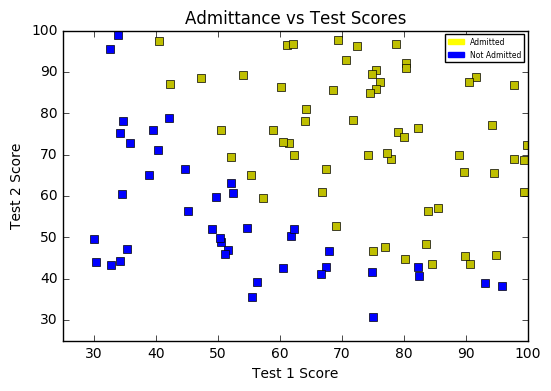

In [459]:
plt.plot(admitted_matrix[:, 0], admitted_matrix[:, 1], "ys", \
            non_admitted_matrix[:, 0], non_admitted_matrix[:, 1], "bs")
GRAPH_EXPAND_VAL = 5
plt.xlim(int(dataset.values[:, 0].min() - GRAPH_EXPAND_VAL), 100)
plt.ylim(int(dataset.values[:, 1].min() - GRAPH_EXPAND_VAL), 100)
plt.title("Admittance vs Test Scores")
plt.xlabel("Test 1 Score")
plt.ylabel("Test 2 Score")

admitted_patch = mpatches.Patch(color="yellow", label="Admitted")
non_admitted_patch = mpatches.Patch(color="blue", label="Not Admitted")

plt.legend(handles=[admitted_patch, non_admitted_patch], prop={"size": 5.5})

plt.show()

## Sigmoid Function

The sigmoid function serves the purpose of reducing the value of our hypothesis in between 0 and 1. Prior to logistic regression, it was proposed that we could attempt to fit a linear regressor through a binary classification problem set. We found that one of the problems with this approach was that the regressor often exceeded or dropped below the 2 values of the binary classification system -- the sigmoid function solves this problem by transforing our function.

<center><h2>$g(z) = \frac{1}{1 + e^{-z}}$</h2></center>

In [460]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Cost Function for Logistic Regression

It is evident that the cost function for logistic regression judges the hypothesis function based off of its promiximity to the actual 1 or 0 value it should predict. For that reason, we use log and constrain its view from 0 to 1 to judge the prediction

<center><h2>$ J(Θ) = -\frac{1}{m} [ \sum y \log(h(x)) + (1-y)\log(1-h(x)) ]$</h2></center>

In [461]:
X_final = np.append(np.ones((X_matrix_original[:, [0]].size, 1)), X_matrix_original, axis=1)
Y_final = Y_matrix_original.copy().ravel()

In [462]:
# OLD
def cost_function_OLD(parameters, X, Y):
    examples_count = Y.size
    inner_result = 0
    
    for i in range(examples_count):
        inner_result = inner_result + (Y[i] * math.log(sigmoid(np.dot(X[i, :], parameters))) \
                        + (1 - Y[i]) * math.log(1 - sigmoid(np.dot(X[i, :], parameters))))
    cost = (-1 / examples_count) * inner_result
    return cost

In [463]:
def cost_function(parameters, X, Y):
    examples_count = Y.size
    
    result = (Y * np.log(sigmoid(np.dot(X, parameters))) \
                        + (1 - Y) * np.log(1 - sigmoid(np.dot(X, parameters)))).sum()
    cost = (-1 / examples_count) * result
    return cost

In [464]:
cost_trial_1 = cost_function(np.array([0.0, 0.0, 0.0]), X_final, Y_final)
print("With h(x) = 0*θ0 + 0*θ1 + 0*θ2, a cost of {} is calculated.".format(cost_trial_1))

With h(x) = 0*θ0 + 0*θ1 + 0*θ2, a cost of 0.6931471805599453 is calculated.


In [465]:
cost_trial_1 = cost_function_OLD(np.array([0.0, 0.0, 0.0]), X_final, Y_final)
print("With h(x) = 0*θ0 + 0*θ1 + 0*θ2, a cost of {} is calculated.".format(cost_trial_1))

With h(x) = 0*θ0 + 0*θ1 + 0*θ2, a cost of 0.693147180559946 is calculated.


In [466]:
# This changed massively after feature scaling
cost_trial_2 = cost_function(np.array([-24, 0.2, 0.2]), X_final, Y_final)
print("With h(x) = -24*θ0 + 0.2*θ1 + 0.2*θ2, a cost of {} is calculated.".format(cost_trial_2))

With h(x) = -24*θ0 + 0.2*θ1 + 0.2*θ2, a cost of 0.21833019382659796 is calculated.


In [467]:
cost_trial_2 = cost_function_OLD(np.array([-24, 0.2, 0.2]), X_final, Y_final)
print("With h(x) = -24*θ0 + 0.2*θ1 + 0.2*θ2, a cost of {} is calculated.".format(cost_trial_2))

With h(x) = -24*θ0 + 0.2*θ1 + 0.2*θ2, a cost of 0.21833019382659788 is calculated.


# Gradient Descent for Logistic Regression

Because the new cost function allows for a convex curve on the J(θ) vs θ curve, we can still use a learning algorithm like gradient descent to optimize θ.

![Image](http://2.bp.blogspot.com/-ZxJ87cWjPJ8/TtLtwqv0hCI/AAAAAAAAAV0/9FYqcxJ6dNY/s1600/gradient+descent+algorithm+OLS.png)

In [468]:
def gradient_descent(X, Y, init_parameters, alpha, iters):
    examples_count = X[:, 0].size # 100
    update_parameters = init_parameters.copy() # [ 0 0 0 ]
    cost_vector = np.zeros(iters) 
    
    for i in range(iters):
        raw_difference = sigmoid(np.dot(X, update_parameters.T)) - Y # proposed vetorized implem
        for j in range(len(update_parameters)):
            inner_term = np.multiply(raw_difference, X[:, j]).sum()
            init_parameters[j] = update_parameters[j] - (alpha * (1 / examples_count)) * inner_term
        
        # Note, parameter changes don't have to be simultaneous with my implementation, here.
        update_parameters = init_parameters.copy()
        cost_vector[i] = cost_function(update_parameters, X, Y)
    
    return cost_vector, update_parameters

#### Note: The parameter values chosen below were found after running {0-9},000,000 iterations of gradient descent!
##### ** Edit: partially due to no feature scaling **
Due to this, in the section after discussing the decision boundary, we'll look at an advanced optimization method that will allow us to more quickly reach our ideal parameter values.

Note: It can also be noted that a normal equation method could have been used to find these parameters.

In [469]:
cost_vector, parameters = gradient_descent(X_final, Y_final, np.array([-24.01828676,   0.19709041,   0.19222144]), .0028, 1)

In [470]:
cost_vector

array([ 0.20369987])

In [471]:
parameters

array([-24.01828777,   0.19709042,   0.19222145])

## Finding the Decision Boundary
So, we've implemented gradient descent and the cost function, and we're getting ready to draw the decision boundary. So, how do we draw it? Recall that the decision boundary is drawn where "z" is equal to 0. The "z" value is the value sent into the sigmoid function.

<center><h2>$g(z) = \frac{1}{1 + e^{-z}}$</h2></center>

It is crucial to recall that the value of z is the dot product of the transpose of Θ and X. In mathematical terms:

<center>$z = Θ^{T} X$</center>

Now, we can solve for Z = Θ.T X = 0 to find our decision boundary!

In [472]:
#array([-24.01828777,   0.19709042,   0.19222145])
coeff1 = 0.19709042 / -0.19222145
coeff2 = -24.01828777 / -0.19222145

In [473]:
X_final[:, [0, 1]]

row1 = np.array(coeff1 * X_final[:, [1]])
row2 = np.array(coeff2 * X_final[:, [0]])

predicted_x2_points = row1 + row2

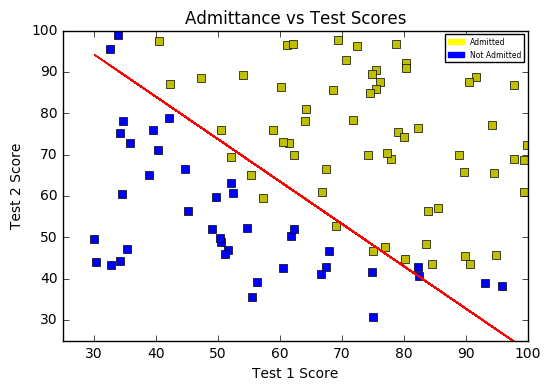

In [474]:
plt.plot(admitted_matrix[:, 0], admitted_matrix[:, 1], "ys", \
            non_admitted_matrix[:, 0], non_admitted_matrix[:, 1], "bs")
plt.plot(X_final[:, [0, 1]], predicted_x2_points, color="red")
GRAPH_EXPAND_VAL = 5
plt.xlim(int(dataset.values[:, 0].min() - GRAPH_EXPAND_VAL), 100)
plt.ylim(int(dataset.values[:, 1].min() - GRAPH_EXPAND_VAL), 100)
plt.title("Admittance vs Test Scores")
plt.xlabel("Test 1 Score")
plt.ylabel("Test 2 Score")

admitted_patch = mpatches.Patch(color="yellow", label="Admitted")
non_admitted_patch = mpatches.Patch(color="blue", label="Not Admitted")

plt.legend(handles=[admitted_patch, non_admitted_patch], prop={"size": 5.5})

plt.show()

## Advanced Optimization Methods
Now, let's take a look at using an advanced optimization method to find our parameters more quickly. Gradient Descent took about 5,000,000+ iterations to reach a satisfying decision boundary. It is clear, then, that using SciPy's optimize module could be of use to us. In specific, we'll look at the usage of fmin_tnc, a *conjugate gradient* method of optimization.

Before we run optimize's fmin_tnc function, we need to modify the cost function and gradient descent just a little bit. Here's a few things we have to do for scipy.optimize.fmin_tnc to work:

1. Leave the iterations and alpha to fmin_tnc -- remove those parameters.
2. Create 'func', a cost function that is vectorized.
3. Create 'fprime', the derivative of the cost function (per parameter) --> minified gradient descent

**Note:** the only reason the cost_function() defined above will not function with fmin_tnc() is simply because of the fact that the x0 keyword argument will always default the parameters to a vector. The above defined cost_function() does not take this into account, creating mathematical errors in the linear algebra, but still returning a cost.

In [475]:
def advanced_cost_function(parameters, X, Y): # func
    parameters = np.expand_dims(parameters, axis=0)
    
    inner_value = - (np.multiply(Y, np.log(sigmoid(np.dot(X, parameters.T)))) + \
                        np.multiply((1 - Y), np.log(1 - sigmoid(np.dot(X, parameters.T)))))
    total_cost = inner_value.sum() / len(X) # a float
    return total_cost

In [476]:
def derivative_cost_function(parameters, X, Y): # fprime
    parameters = np.expand_dims(parameters, axis=0) # default is 1D, so we must expand_dims
    result_parameters = np.zeros((parameters.shape[1], 1))
    raw_difference = sigmoid(np.dot(X, parameters.T)) - Y
    
    for i in range(len(parameters.ravel())):
        result_parameters[i] = np.multiply(raw_difference, X[:, [i]]).sum() / len(X)
    
    return result_parameters

In [477]:
from scipy import optimize

In [478]:
advanced_parameters_results = optimize.fmin_tnc(func=advanced_cost_function, x0=np.array([[0.0, 0.0, 0.0]]), fprime=derivative_cost_function, args=(X_final, np.expand_dims(Y_final, axis=1)))

**What does fmin_tnc return?** scipy.optimize.fmin_tnc() returns a vector of the predicted parameters, iteration count, and a status code!

In [479]:
advanced_parameters_results

(array([-25.16131866,   0.20623159,   0.20147149]), 36, 0)

In [480]:
param0 = advanced_parameters_results[0][0]
param1 = advanced_parameters_results[0][1]
param2 = advanced_parameters_results[0][2]

In [481]:
cost_function(advanced_parameters_results[0], X_final, Y_final)

0.20349770158947444

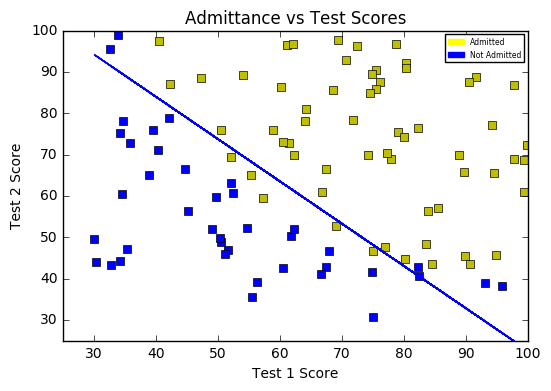

In [482]:
plt.plot(admitted_matrix[:, 0], admitted_matrix[:, 1], "ys", \
            non_admitted_matrix[:, 0], non_admitted_matrix[:, 1], "bs")
plt.plot(X_final[:, 1], ((0.20623159 / -0.20147149) * X_final[:, 1]) + (25.16131866 / 0.20147149)) 
GRAPH_EXPAND_VAL = 5
plt.xlim(int(dataset.values[:, 0].min() - GRAPH_EXPAND_VAL), 100)
plt.ylim(int(dataset.values[:, 1].min() - GRAPH_EXPAND_VAL), 100)
plt.title("Admittance vs Test Scores")
plt.xlabel("Test 1 Score")
plt.ylabel("Test 2 Score")

admitted_patch = mpatches.Patch(color="yellow", label="Admitted")
non_admitted_patch = mpatches.Patch(color="blue", label="Not Admitted")

plt.legend(handles=[admitted_patch, non_admitted_patch], prop={"size": 5.5})

plt.show()

## Making a Prediction

Now that we have our parameters, we can make a full prediction using a hypothesis function. *Recall*, that above we defined param0, param1, and param2 for our parameter values.

In [483]:
def predict(test_score_1, test_score_2):
    parameters = np.array([param0, param1, param2])
    new_example = np.array([[1, test_score_1, test_score_2]])
    
    prediction = sigmoid(np.dot(new_example, parameters.T))[0]
    return prediction

In [484]:
predict(70, 55)

0.58802924337624463

In [485]:
print("For a student with scores 45 and 85, we predict an admission probability of {} +- 0.002".format(predict(45, 85)))

For a student with scores 45 and 85, we predict an admission probability of 0.7762906244027636 +- 0.002


### Using a boundary to make a final decision

$h(x) > 0.5 ? 1 (Admitted) : 0 (Not Admitted)$

In [486]:
def decision(test_score_1, test_score_2):
    return (1, "admitted") if predict(test_score_1, test_score_2) >= 0.5 else (0, "not admitted")

In [487]:
decision(45, 85)

(1, 'admitted')

## Measuring Accuracy

Let's wrap up non-regularized logistic regression by seeing how many of the predictions against the training set we would jave gotten correct!

In [488]:
correct = 0
for row in dataset.values[:,[0, 1, 2]]:
    if decision(row[0], row[1])[0] == int(row[2]):
        correct += 1
print("Expected accuracy (approx): {}".format(correct / len(dataset)))

Expected accuracy (approx): 0.89


# Homework 2 Extra - Regularized Logistic Regression

Often times, you may be solving a business problem that presents itself with source data that has many features. You are susceptible to overfitting, a phenomenom that occurs when your learned hypothesis function does not generalize for new test (or training) examples.

From the looks of overfitting, it may seem like your hypothesis function *perfectly* fit your training data. However, it might have a weird "look" to it, after visualization. You may notice that it goes "out of its way" to fit examples. This is often due to the fact that a dataset with many features (and, often times, few training examples) leads to generating a very high order hypothesis function.

These very high order functions could practically fit anything, and therefore they have **high variance**. You have two methods to reduce this variance, and effectively end overfitting:

1. Remove Parameters
2. Regularization

Regularization is a technique that allows you to reduce the weight of parameters in such a way that "simplifies" the hypothesis function -- this simplification could lead to certain parameters becoming low-valued, or even 0 (meaning they were effectively removed). We add a **regularization parameter** to our cost function to *penalize* parameters in such a way that they remain smaller / don't grow too quickly.

## Cost Function, meet Regularization Term

To reduce the weights of our parameters, we have to *penalize* them. The only place in a machine learning algorithm where penalization could make sense is the cost function. By artificially increasing the cost of any given parameter, we are reducing its weight, as it will take a longer time to reach a value that would lead to overfitting. 

![Image](http://i.imgur.com/xA810Fr.png)

In turn, this affects gradient descent. We explore that a few cells below.


**Modifying the cost_function from our scratch implementation**

### NOTE: The lines before "Prepocessing" are regularization implementations, tested on the old dataset

In [489]:
def regularized_cost_function(parameters, X, Y, regularization_parameter):
    examples_count = Y.size
    
    actual_cost = (1 / examples_count) * ((-Y * np.log(sigmoid(np.dot(X, parameters))) \
                        - (1 - Y) * np.log(1 - sigmoid(np.dot(X, parameters)))).sum())
    # squared_parameters = np.append(parameters[0], np.power(parameters[1:], 2)).sum()
    squared_parameters = np.power(parameters[1:], 2).sum()
    regularization_term = (regularization_parameter / (2 * examples_count)) * squared_parameters
    regularized_cost = actual_cost + regularization_term
    return regularized_cost

Let's try finding cost of using the parameters [-24, 0.2, 0.2] like when we first made the cost_function. First, we'll use a regularization_parameter of 0, which is the equivalent of not having any regularization (we should get the same result as before).

In [490]:
reg_cost_trial_1 = regularized_cost_function(np.array([-24, 0.2, 0.2]), X_final, Y_final, 0)

In [491]:
reg_cost_trial_1

0.21833019382659796

Great! That checks out. Now, let's try it with a value of 5.

In [492]:
reg_cost_trial_2 = regularized_cost_function(np.array([-24, 0.2, 0.2]), X_final, Y_final, 5)

In [493]:
reg_cost_trial_2

0.22033019382659796

Perfect! The absolute cost increased, meaning the absolute values of our parameters will decrease in weight.

### Problem Description

We are analyzing data from a factory that produces microchips. All microchips need to go under quality assurance (QA), using two "microchip tests". Our goal is to produce a non-linear decision boundary that seperates the microhips with the results of the two tests that pass QA, from those that do not.

### Preprocessing

In [494]:
dataset_2 = pd.read_csv("ex2data2.txt", header=None)
dataset_2.columns = ["Test 1", "Test 2", "QA Result"]
dataset_2.head()

,Test 1,Test 2,QA Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [495]:
# Seperate the independent and dependent variables
X_matrix = dataset_2.iloc[:, [0, 1]].values
Y_matrix = dataset_2.iloc[:, -1].values

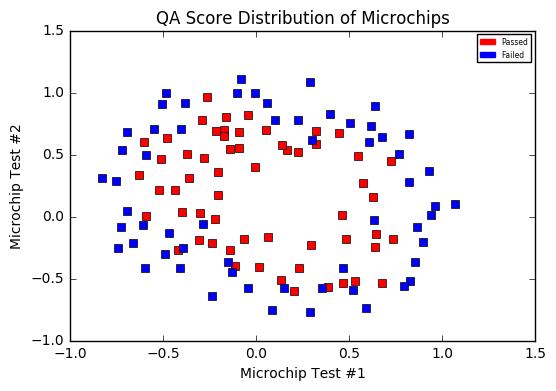

In [496]:
plt.plot(X_matrix[0:58, 0], X_matrix[0:58, 1], 'rs', X_matrix[59:, 0], X_matrix[59:, 1], 'bs')

passed_patch = mpatches.Patch(color="red", label="Passed")
failed_patch = mpatches.Patch(color="blue", label="Failed")

plt.legend(handles=[passed_patch, failed_patch], prop={"size": 5.5})

plt.xlabel("Microchip Test #1")
plt.ylabel("Microchip Test #2")
plt.title("QA Score Distribution of Microchips")
plt.show()

## Adding Polynomial Features
At this point, it's obvious that the decision boundary for this data is non-linear. It seems to be that the data is seperated by some type of ellipse. To achieve that ellipse, it's in our best interest to add polynomial features to our dataset so that gradient descent has more parameters to manipulate in order to achieve the right shape.

But.... isn't adding more features going to lead us to overfitting? The answer is, it will! However, recall that we are coming into this section with regularized implementations of the cost function. This will help us get an appropriate bound, after we implement

In [497]:
X_polynomial = np.append(X_matrix, np.power(X_matrix, 2), axis=1)

In [498]:
X_polynomial = np.append(np.ones((118, 1)), X_polynomial, axis=1)

## Gradient Descent, meet Regularization Term
It looks something like this.
<center><h2>repeat until converge {</h2></center><br>
<center>$\Theta _{0} - \alpha [\frac{1}{m} \sum_{i=1}^{m} (h(x^{i}) - y^{i})x_{i}^{j}]$</center><br>
<center>$\Theta _{j} - \alpha [\frac{1}{m} \sum_{i=1}^{m} (h(x^{i}) - y^{i})x_{i}^{j} + \frac{\lambda}{m} \Theta _{j}]$</center>
<h2 style="margin-left:35%">}</h2>

In [499]:
def regularized_gradient_descent(X, Y, init_parameters, alpha, iters, reg_term):
    examples_count = X[:, 0].size # 100
    reg_update_parameters = init_parameters.copy() # [ 0 0 0 ]
    reg_cost_vector = np.zeros(iters) 
    
    for i in range(iters):
        raw_difference = sigmoid(np.dot(X, reg_update_parameters.T)) - Y # proposed vetorized implem
        for j in range(len(reg_update_parameters)):
            inner_term = np.multiply(raw_difference, X[:, j]).sum()
            # With regularization, we add the reg term multiplied by the current parameter
            if j == 0:
                full_inner_term = (1 / examples_count) * inner_term
            else:
                full_inner_term = (1 / examples_count) * inner_term + ((reg_term / examples_count) * reg_update_parameters[j])
            # the alpha * 1/m done in one sweep with this next line
            init_parameters[j] = reg_update_parameters[j] - (alpha * full_inner_term)
        
        # Note, parameter changes don't have to be simultaneous with my implementation, here.
        reg_update_parameters = init_parameters.copy()
        reg_cost_vector[i] = cost_function(reg_update_parameters, X, Y)
    
    return reg_cost_vector, reg_update_parameters

Great, now let's try to calculate the cost of all thetas as 0, with lambda = 1!

In [500]:
regularized_cost_function(np.array([0.0, 0.0, 0.0, 0.0, 0.0]), X_polynomial, Y_matrix, 1)

0.6931471805599454

Looks like we go the result we wanted! Now let's try with all thetas as 1, with lambda = 10!

In [501]:
regularized_cost_function(np.array([1.0, 1.0, 1.0, 1.0, 1.0]), X_polynomial, Y_matrix, 10)

1.379499994966312

In [502]:
reg_cost_vector, reg_parameters = regularized_gradient_descent(X_polynomial, Y_matrix, np.array([1.19697377,  0.21885289,  0.57109695, -2.71474586, -2.27107429]), 1, 10, 1)

In [503]:
reg_cost_vector

array([ 0.53634105,  0.53634105,  0.53634105,  0.53634105,  0.53634105,
        0.53634105,  0.53634105,  0.53634105,  0.53634105,  0.53634105])

In [504]:
predicted_parameters = np.expand_dims(reg_parameters, axis=1)
predicted_parameters

array([[ 1.19697377],
       [ 0.21885289],
       [ 0.57109695],
       [-2.71474586],
       [-2.27107429]])

In [505]:
x2_pred = ((2.27107429 * X_polynomial[:, 4]) + (2.71474586 * X_polynomial[:, 3]) - (0.21885289 * X_polynomial[:, 1]) - (1.19697377 * X_polynomial[:, 0])) / 0.57109695

In [506]:
y_predictions = np.abs(np.dot(X_polynomial, predicted_parameters))
wrong = 0
right = 0

for i in range(len(y_predictions)):
    if i < 85:
        if y_predictions[i][0] < 0.5:
            wrong += 1
        else:
            right += 1
    else:
        if y_predictions[i][0] >= 0.5:
            wrong += 1
            right += 1

In [507]:
print("Accuracy of {}%".format((right / (right + wrong)) * 100))

Accuracy of 48.739495798319325%


### Drawing a Decision Boundary

We've provided 5 parameters, x0, x1, x2, x1^2, x2^2. It's possible that even with the addition of these two features, we might not be accurate enough. In that case, you will want to add more features to X_polynomial so gradient descent has more variables at its disposal to adjust and get that answer we want (recall: the more parameters, the higher variance, making it easier to get a better prediction -- it also solidifies our usage of regularization).

To draw a decision boundary, we will set the hypothesis equation to 0, and solve for the feature that represents the Y axis.

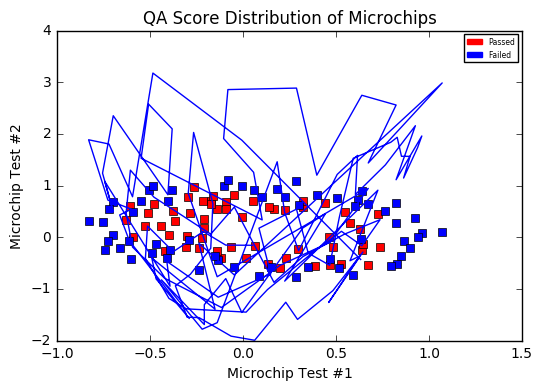

In [508]:
plt.plot(X_matrix[0:58, 0], X_matrix[0:58, 1], 'rs', X_matrix[58:, 0], X_matrix[58:, 1], 'bs')
plt.plot(X_matrix[:, 0], x2_pred)

passed_patch = mpatches.Patch(color="red", label="Passed")
failed_patch = mpatches.Patch(color="blue", label="Failed")

plt.legend(handles=[passed_patch, failed_patch], prop={"size": 5.5})

plt.xlabel("Microchip Test #1")
plt.ylabel("Microchip Test #2")
plt.title("QA Score Distribution of Microchips")
plt.show()

NOTE: This looks absolutely terrible, which means we should use an advanced optimization method.

## Advanced Optimization Methods

![Image](http://i.imgur.com/xA810Fr.png)

In [509]:
def new_advanced_cost_function(parameters, X, Y, reg_term): # func
    parameters = np.expand_dims(parameters, axis=0)
    
    inner_value = - (np.multiply(Y, np.log(sigmoid(np.dot(X, parameters.T)))) + \
                        np.multiply((1 - Y), np.log(1 - sigmoid(np.dot(X, parameters.T)))))
    squared_parameters = np.power(parameters[1:], 2).sum()
    total_cost = (inner_value.sum() / len(X)) + (reg_term / (2 * len(X))) * squared_parameters
    return total_cost

In [510]:
def new_derivative_cost_function(parameters, X, Y, reg_term): # fprime
    parameters = np.expand_dims(parameters, axis=0) # default is 1D, so we must expand_dims
    result_parameters = np.zeros((parameters.shape[1], 1))
    raw_difference = sigmoid(np.dot(X, parameters.T)) - Y
    
    for i in range(len(parameters.ravel())):
        if i == 0:
            result_parameters[i] = np.multiply(raw_difference, X[:, [i]]).sum() / len(X)
        else:
            result_parameters[i] = (np.multiply(raw_difference, X[:, [i]]).sum() / len(X)) + \
                                        (reg_term / len(X)) * parameters[:, i]
    
    return result_parameters

In [511]:
Y_2D = np.expand_dims(Y_matrix, axis=1)
new_advanced_cost_function(np.array([0.0, 0.0, 0.0, 0.0, 0.0]), X_polynomial, Y_2D, 1)

0.6931471805599454

In [512]:
new_derivative_cost_function(np.array([0.0, 0.0, 0.0, 0.0, 0.0]), X_polynomial, Y_2D, 1)

array([[  8.47457627e-03],
       [  1.87880932e-02],
       [  7.77711864e-05],
       [  5.03446395e-02],
       [  3.76648474e-02]])

In [513]:
optimize.fmin_tnc(func=new_advanced_cost_function, x0=np.array([1.0, 1.0, 1.0, 1.0, 1.0]), \
                  fprime=new_derivative_cost_function, args=(X_polynomial, Y_2D, 1))

(array([ 1.19697143,  0.21884893,  0.5710955 , -2.71474108, -2.27107021]),
 38,
 0)

TODO (soon): In future, add more polynomial terms... clearly x1^2 and x2^2 were not enough. fmin_tnc gives same result as gradien descent, meaning same accuracy!